<h1> Polynomial regression in 2D

Now consider the bivariate data set given below.

$$\begin{array}{ccc} \hline
  X_1 & X_2 &  Y  \\ \hline
         0  & 32.1205 &  6.8053 \\
    0.0714  & 29.7601 & -1.5184 \\
    0.1429  & 30.6798 &  1.6416 \\
    0.2023  & 22.1313 &  2.0121 \\
    0.2857  & 27.6573 &  6.3543 \\
    0.3571  & 26.5302 & 14.3442 \\
    0.4001  & 18.63   & 25.3121 \\
    0.4286  & 25.0 &    16.4426 \\
    0.5714  & 23.1148 &  18.1953 \\
    0.6429  & 21.2932 &  28.9913 \\
    0.7143  & 22.4207 &  27.2246 \\
    0.7857  & 21.1507 &  40.3759 \\
    0.8310  & 22.91923 & 45.12322 \\
    0.9286  & 19.5951 & 55.3726 \\
    1.0000  & 18.022  & 72.0 \\ \hline
\end{array}$$

We will apply the exact same set of function calls as we did in the prior 1D regression notebook. 

In [1]:
%matplotlib inline
from effective_quadratures.polynomial import PolyFit
from effective_quadratures.utils import meshgrid
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

In [2]:
x_train = np.mat([[0.0, 32.1205], 
[0.0714, 29.7601],
[0.1429, 30.6798],
[0.2023, 22.1313],
[0.2857, 27.6573],
[0.3571, 26.5302],
[0.4001, 18.63],
[0.4286, 25.0],
[0.5714, 23.1148],
[0.6429, 21.2932],
[0.7143, 22.4207],
[0.7857, 21.1507],
[0.8310, 22.91923],                  
[0.9286, 19.5951],
[1.0000, 18.022]], dtype='float64')
y_train = np.mat([6.8053,-1.5184,1.6416,2.0121,6.3543,14.3442,25.3121,16.4426,18.1953,28.9913,27.2246,40.3759,45.12322, 55.3726,72.0], dtype='float64')
poly1 = PolyFit(x_train, y_train.T, 'linear')

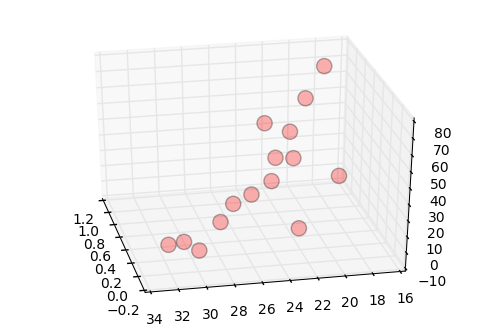

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0].A1, x_train[:,1].A1, y_train.A1, c='red', marker='o', s=120, alpha=0.3)
ax.view_init(elev=31., azim=168)

Now we fit a surface through these points using the following 'test' data

In [4]:
X1 = np.arange(-0.2, 1.2, 0.05)
X2 = np.arange(16, 34, 0.5)
xx1, xx2 = np.meshgrid(X1, X2)
u, v = xx1.shape
x_test = np.mat( np.hstack( [np.reshape(xx1, (u*v, 1)),  np.reshape(xx2, (u*v, 1)) ]) , dtype='float64')
y_test = poly1.testPolynomial(x_test)
yy1 = np.reshape(y_test, (u, v))

Now let's plot the figure

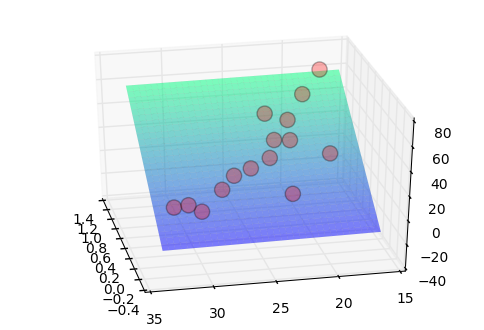

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=31., azim=168)
ax.plot_surface(xx1,xx2, yy1,rstride=1, cstride=1, cmap=cm.winter, linewidth=0.02, alpha=0.5)
ax.scatter(x_train[:,0].A1, x_train[:,1].A1, y_train.A1, c='red', marker='o', s=120, alpha=0.3)
plt.show()

Now what if we try a quadratic surface

In [6]:
poly2 = PolyFit(x_train, y_train.T, 'quadratic')
y_test2 = poly2.testPolynomial(x_test)
yy2 = np.reshape(y_test2, (u, v))

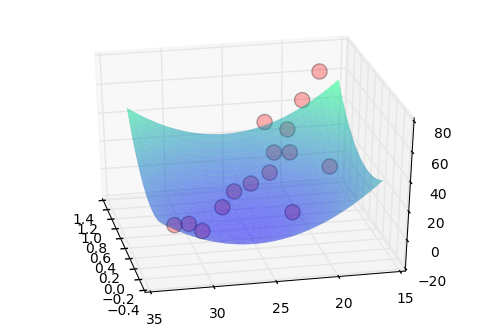

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=31., azim=168)
ax.plot_surface(xx1,xx2, yy2,rstride=1, cstride=1, cmap=cm.winter, linewidth=0.02, alpha=0.5)
ax.scatter(x_train[:,0].A1, x_train[:,1].A1, y_train.A1, c='red', marker='o', s=120, alpha=0.3)
plt.show()

Voila! That concludes this quick regression tutorial. Note: you can also approximate functions of more than two variables using the same subroutine calls!